In [4]:
#Imports
library(nnet)
library(mgcv)
#read data
data <- read.csv("/content/red_wine.csv")
head(data)
n <- nrow(data)
#seperate into test, training data
train <- data[1:1000,]
test <- data[1001:n,]
test_X <- subset(test, select = -quality)
test_y <- subset(test, select = quality)

train_X <- subset(train, select = -quality)
train_y <- train$quality



Loading required package: nlme

This is mgcv 1.9-3. For overview type 'help("mgcv-package")'.


Attaching package: ‘mgcv’


The following object is masked from ‘package:nnet’:

    multinom




,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


In [ ]:
#DO NOT RUN!!! NN IS NON-DETERMINISTIC, THIS VALUES ARE USED IN THE REPORTS!!!
#!!!


# Perform nn with two hidden layer, 0 decay
est_nn <- nnet(train_X,train_y, size=2, decay=0, linout=F, maxit=2000)
summary(est_nn)

# weights:  27
initial  value 273.429292 
iter  10 value 230.916635
iter  20 value 221.333015
iter  30 value 214.943270
iter  40 value 203.973684
iter  50 value 191.150325
iter  60 value 187.237091
iter  70 value 183.024205
iter  80 value 175.329748
iter  90 value 174.676285
iter 100 value 173.431267
iter 110 value 172.588667
iter 120 value 170.689937
iter 130 value 168.876469
iter 140 value 165.912794
iter 150 value 164.066555
iter 160 value 162.827748
iter 170 value 161.150851
iter 180 value 160.899224
iter 190 value 160.302049
iter 200 value 159.752664
iter 210 value 159.564823
iter 220 value 158.877779
iter 230 value 158.773828
iter 240 value 158.705060
iter 250 value 158.516694
iter 260 value 158.430046
iter 270 value 158.386492
iter 280 value 158.114293
iter 290 value 158.083708
iter 300 value 158.009446
iter 310 value 157.959478
iter 320 value 157.923836
iter 330 value 157.876337
iter 340 value 157.872025
iter 350 value 157.856275
iter 360 value 157.843287
iter 370 value 157.824

a 11-2-1 network with 27 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
 -27.66   -0.11    0.66    0.58   -0.04   -0.16    0.00    0.00   29.92   -0.25 
i10->h1 i11->h1 
  -0.37   -0.21 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
 -43.37   -4.86  -56.37   28.17   -2.23   88.36    0.54    0.98  -38.22    8.96 
i10->h2 i11->h2 
  97.95    5.00 
  b->o  h1->o  h2->o 
-27.52 -28.97  33.87 

# weights:  651
initial  value 188.260598 
iter  10 value 115.162113
iter  20 value 80.928378
iter  30 value 63.977523
iter  40 value 51.836257
iter  50 value 42.579147
iter  60 value 36.381000
iter  70 value 32.997234
iter  80 value 30.919068
iter  90 value 29.230044
iter 100 value 28.275197
iter 110 value 27.183797
iter 120 value 26.762265
iter 130 value 26.446607
iter 140 value 26.252570
iter 150 value 26.084022
iter 160 value 25.937024
iter 170 value 25.765393
iter 180 value 25.655378
iter 190 value 25.577663
iter 200 value 25.495630
iter 210 value 25.453696
iter 220 value 25.400398
iter 230 value 25.370479
iter 240 value 24.935035
iter 250 value 24.639420
iter 260 value 24.503206
iter 270 value 24.434212
iter 280 value 24.399476
iter 290 value 23.923780
iter 300 value 23.622655
iter 310 value 23.584498
iter 320 value 23.569866
iter 330 value 23.559738
iter 340 value 23.534330
iter 350 value 23.511110
iter 360 value 23.495130
iter 370 value 23.481322
iter 380 value 23.473229
iter 3

[1] 0.3218182

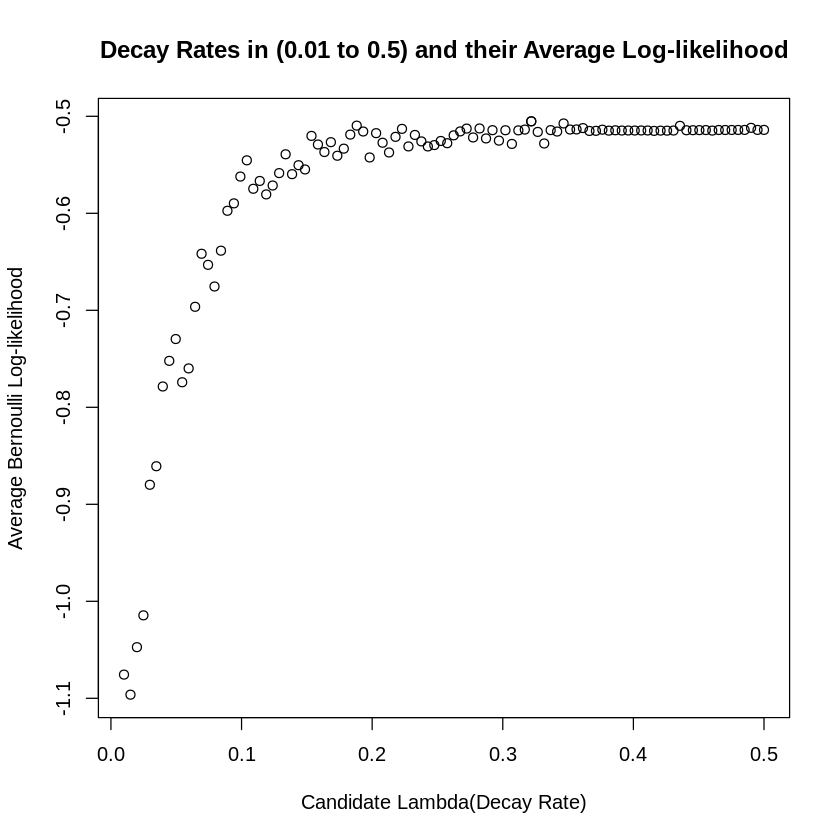

In [ ]:
#standardize training data
train_Xs <- train_X
for(i in 1:ncol(train_Xs)){
  train_Xs[,i] <- (train_X[,i]-mean(train_X[,i]))/sd(train_X[,i])
}

#seperate the training set again to cross validate for lambda:decay rate
y_in <- train_y[1:700]
y_sel <- train_y[701:1000]
X_in <- train_Xs[1:700,]
X_sel <- train_Xs[701:1000,]

#go over a seq of 0.01 to 0.5 for lambda seperated in 100 values
a <- seq(0.01,0.5, length.out = 100)
out <- rep(NA,100)
#cross validate by performing an nn and store the attained loglikelihood of bernoulli
for(i in 1:100){
  est_nn <- nnet(X_in, y_in, size=50, decay=a[i], linout=F, maxit=2000)
  yhat <- predict(est_nn, newdata = X_sel)
  out[i] <- mean(y_sel*log(yhat)+(1-y_sel)*log(1-yhat))
}
#select the lambda that attained the maximum ll from the sequence
optimal_decay <- a[which(out==max(out))]
#plot the candidate lambdas and ll
plot(a,out, xlab = "Candidate Lambda(Decay Rate)", ylab = "Average Bernoulli Log-likelihood", main = "Decay Rates in (0.01 to 0.5) and their Average Log-likelihood")
points(optimal_decay, max(out))
print("Optimal decay rate:")
optimal_decay


In [ ]:
# optimal lambda : 0.321818181818182; it's avg log-likelihood = -0.505163845231006
#Standardize the test data
test_Xs <- test_X
for(i in 1:ncol(test_Xs)){
  test_Xs[,i] <- (test_X[,i]-mean(test_X[,i]))/sd(test_X[,i])
}
arr = rep(NA, 100)
#nn is non-deterministic, so accuracy will vary everytime.
#Run the nn 100 times, and take the max, min, avg accuracy
for(k in c(1:100)){
est_nn <-  nnet(train_Xs, train_y, size=50, decay=optimal_decay, linout=F, maxit=2000)
yhat<- predict(est_nn, test_Xs)
#Assign binary values, depending on whether p_success >/<= 0.5
for(i in c(1:nrow(yhat))){
  if (yhat[i] > 0.5){
    yhat[i] <- 1
  }
  else{
    yhat[i] <- 0
  }
}


arr[k] <- mean(yhat == test_y)
}

print("Maximum accuracy obtained:")
max(arr)
print("Minimum accuracy obtained:")
min(arr)
print("Average accuracy obtained:")
mean(arr)

# weights:  651
initial  value 441.044383 
iter  10 value 214.954211
iter  20 value 176.908663
iter  30 value 172.510321
iter  40 value 169.870501
iter  50 value 168.998687
iter  60 value 168.266683
iter  70 value 167.923106
iter  80 value 167.830731
iter  90 value 167.813712
iter 100 value 167.803092
iter 110 value 167.796069
iter 120 value 167.792939
iter 130 value 167.791544
iter 140 value 167.790869
iter 150 value 167.790063
iter 160 value 167.789491
iter 170 value 167.789330
iter 180 value 167.789231
iter 190 value 167.789139
iter 200 value 167.789077
iter 210 value 167.789037
iter 220 value 167.788988
iter 230 value 167.788902
iter 240 value 167.788868
final  value 167.788865 
converged
# weights:  651
initial  value 398.245350 
iter  10 value 186.095291
iter  20 value 172.233945
iter  30 value 169.935661
iter  40 value 169.206518
iter  50 value 168.711268
iter  60 value 168.253491
iter  70 value 168.110793
iter  80 value 168.041510
iter  90 value 168.029666
iter 100 value 168.02

[1] 0.754591

[1] "Minimum accuracy obtained:"


[1] 0.7262104

[1] "Average accuracy obtained:"


[1] 0.7407346

In [ ]:
summary(est_nn)

a 11-50-1 network with 651 weights
options were - decay=0.3218182
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.00   -0.09   -0.08    0.03   -0.04   -0.07   -0.01   -0.07   -0.13   -0.02 
i10->h1 i11->h1 
   0.02    0.05 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.07   -0.98    0.17   -0.90    0.13    0.25   -0.61   -0.19    0.20    0.72 
i10->h2 i11->h2 
  -0.91    1.06 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   0.00   -0.09   -0.08    0.03   -0.04   -0.07   -0.01   -0.07   -0.13   -0.02 
i10->h3 i11->h3 
   0.02    0.05 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
   0.00    0.10    0.09   -0.03    0.04    0.07    0.01    0.07    0.13    0.02 
i10->h4 i11->h4 
  -0.02   -0.05 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9->h5 
   0.00    0.09    0.09   -0.03    0.04    0.07    0.01    0.07    0.

In [5]:
# Perfrom non-parametric logistic additive model
#form the training data
quality <- train_y
train_data <- cbind(train_X, quality)
#non par estimate, logistic link
est_non_par <- gam(quality ~ s(alcohol)+s(sulphates)+s(pH)+s(density)+s(total.sulfur.dioxide)+
  s(free.sulfur.dioxide)+s(chlorides)+s(residual.sugar)+s(citric.acid)+s(volatile.acidity)+s(fixed.acidity), family = binomial, data = train_data)
summary(est_non_par)
#Make prediction ~y
yhat_non_par <- predict(est_non_par, test_X)
#Assign 0/1 on p_success </<= 0.5
for(i in c(1:nrow(yhat_non_par))){
  if (yhat_non_par[i] > 0.5){
    yhat_non_par[i] <- 1
  }
  else{
    yhat_non_par[i] <- 0
  }
}

print("Accuracy of non-parametric additive model:")
#Average correctly predicted, accuracy
mean(yhat_non_par == test_y)


Family: binomial 
Link function: logit 

Formula:
quality ~ s(alcohol) + s(sulphates) + s(pH) + s(density) + s(total.sulfur.dioxide) + 
    s(free.sulfur.dioxide) + s(chlorides) + s(residual.sugar) + 
    s(citric.acid) + s(volatile.acidity) + s(fixed.acidity)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.08857    0.14484   0.611    0.541

Approximate significance of smooth terms:
                          edf Ref.df Chi.sq  p-value    
s(alcohol)              6.903  7.829 45.301  < 2e-16 ***
s(sulphates)            3.538  4.400 43.882  < 2e-16 ***
s(pH)                   2.017  2.602  1.160   0.5537    
s(density)              3.983  4.986 10.203   0.0684 .  
s(total.sulfur.dioxide) 3.228  4.023 31.521 2.07e-06 ***
s(free.sulfur.dioxide)  1.371  1.656  1.552   0.2898    
s(chlorides)            5.391  6.534 11.407   0.1033    
s(residual.sugar)       7.885  8.152 10.873   0.1968    
s(citric.acid)          1.926  2.426  9.250   0.0187 *  
s

[1] "Accuracy of non-parametric additive model:"


[1] 0.7529215